In [1]:
import re
import pandas as pd
import datetime
import mysql.connector
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
conexao = mysql.connector.connect(host='localhost',user='root',password='',database='producao')
cursor = conexao.cursor()

Tempo médio de dias para concessão: 2002 = 5.73
Tempo médio de dias para concessão: 2003 = 6.82
Tempo médio de dias para concessão: 2004 = 7.82
Tempo médio de dias para concessão: 2005 = 8.45
Tempo médio de dias para concessão: 2006 = 9.69
Tempo médio de dias para concessão: 2007 = 10.54
Tempo médio de dias para concessão: 2008 = 11.33
Tempo médio de dias para concessão: 2009 = 11.67
Tempo médio de dias para concessão: 2010 = 11.99
Tempo médio de dias para concessão: 2011 = 12.23
Tempo médio de dias para concessão: 2012 = 12.31
Tempo médio de dias para concessão: 2013 = 12.86
Tempo médio de dias para concessão: 2014 = 12.13
Tempo médio de dias para concessão: 2015 = 12.57
Tempo médio de dias para concessão: 2016 = 12.93
Tempo médio de dias para concessão: 2017 = 12.24
Tempo médio de dias para concessão: 2018 = 12.09
Tempo médio de dias para concessão: 2019 = 11.35
Tempo médio de dias para concessão: 2020 = 10.60
Tempo médio de dias para concessão: 2021 = 9.93
Tempo médio de dias para c

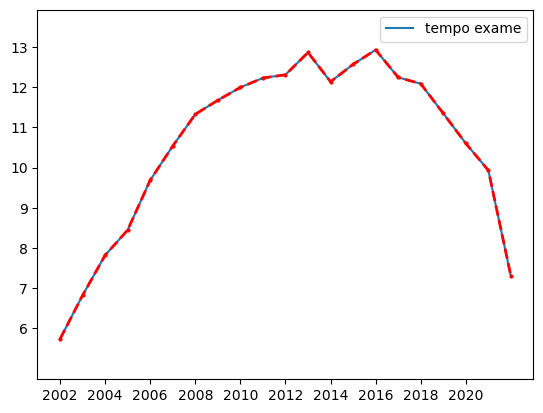

In [5]:
def numOfDays(date1, date2):
    return (date2-date1).days

y = []
x = []
#confere média de tempo de registro
for ano in range(2002, 2023, 1):
    soma = 0
    total = 0
    comando = f'select * from arqpatentes where year(concessao)={ano}'
    cursor.execute(comando)
    resultado = cursor.fetchall()
    for row in resultado:
        #print("numero= "+str(row[0]))
        #print("data deposito= "+str(row[1]))
        d=datetime.datetime.strptime(str(row[1]), "%Y-%m-%d")
        date1 = datetime.date(d.year, d.month, d.day)
        #print("data concessao= "+str(row[4]))
        d=datetime.datetime.strptime(str(row[4]), "%Y-%m-%d")
        date2 = datetime.date(d.year, d.month, d.day)
        #print(numOfDays(date1, date2)/365, "anos")
        soma = soma + numOfDays(date1, date2)
        total = total + 1
        #print("\n")
    
    media = soma/total/365
    y.append(media)
    x.append(ano)
    print(f'Tempo médio de dias para concessão: {ano} = {media:.2f}')

plt.plot(x,y,label="tempo exame")
plt.ylim(min(y)-1, max(y) + 1)
plt.yticks(range(6,14,1))
plt.xlim(min(x)-1, max(x)+1)
plt.xticks(range(min(x), max(x),2))
plt.legend()
plt.plot(x,y,color='r' , marker='o', markersize=2, linestyle='dashed', linewidth=2)
plt.show()


Tempo médio de dias para concessão: 1837 1 = 7.72
Tempo médio de dias para concessão: 2118 2 = 7.64
Tempo médio de dias para concessão: 2261 3 = 7.57
Tempo médio de dias para concessão: 2056 4 = 7.70
Tempo médio de dias para concessão: 2857 5 = 7.56
Tempo médio de dias para concessão: 1686 6 = 7.35
Tempo médio de dias para concessão: 1655 7 = 7.12
Tempo médio de dias para concessão: 2379 8 = 6.96
Tempo médio de dias para concessão: 1902 9 = 7.29
Tempo médio de dias para concessão: 1700 10 = 6.77
Tempo médio de dias para concessão: 1646 11 = 6.65


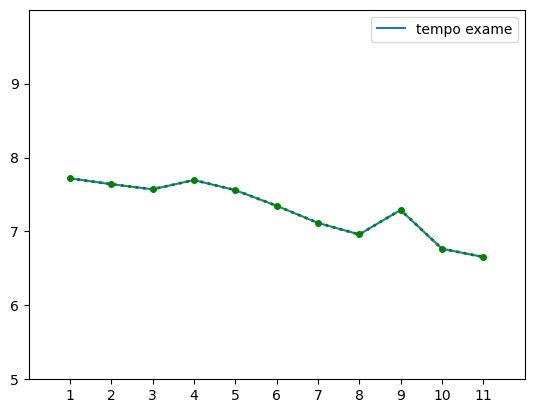

In [6]:
y = []
x = []
#confere média de tempo de registro
for mes in range(1, 12, 1):
    ano = 2022
    soma = 0
    total = 0
    comando = f'select * from arquivadosxml where year(data)={ano} and month(data)={mes} and despacho="16.1" and anulado=0'
    cursor.execute(comando)
    resultado = cursor.fetchall()
    for row in resultado:
        numero = str(row[2])
        d=datetime.datetime.strptime(str(row[3]), "%Y-%m-%d")
        date1 = datetime.date(d.year, d.month, d.day)
        
        comando = f"select * from depositados where numero='{numero}'"
        try:
            cursor.execute(comando)
            resultado = cursor.fetchone()
            if resultado is not None:
                d = resultado[1]
                data_deposito = str(d.year) + '-' + str(d.month) + '-' + str(d.day)
                #print(data_deposito)
        except (mysql.connector.Error, mysql.connector.Warning) as e:
            print(e)
            print(str(numero))

        date2 = datetime.date(d.year, d.month, d.day)
        soma = soma + numOfDays(date2, date1)
        total = total + 1
    
    media=0
    if total>0:
        media = soma/total/365
    y.append(media)
    x.append(mes)
    print(f'Tempo médio de dias para concessão: {total} {mes} = {media:.2f}')

plt.plot(x,y,label="tempo exame")
plt.ylim(5, 10)
plt.yticks(range(5,10,1))
plt.xlim(min(x)-1, max(x)+1)
plt.xticks(range(1, 12 , 1))
plt.legend()
plt.plot(x,y,color='green' , marker='o', markersize=4, linestyle=':', linewidth=2)
plt.show()


Taxa deferimento: 1218 1 = 78.74
Taxa deferimento: 2277 2 = 83.71
Taxa deferimento: 3170 3 = 82.90
Taxa deferimento: 2164 4 = 83.87
Taxa deferimento: 2348 5 = 85.60
Taxa deferimento: 2279 6 = 84.69
Taxa deferimento: 2698 7 = 83.40
Taxa deferimento: 2478 8 = 83.66
Taxa deferimento: 2526 9 = 83.65
Taxa deferimento: 2515 10 = 81.03
Taxa deferimento: 2163 11 = 84.60


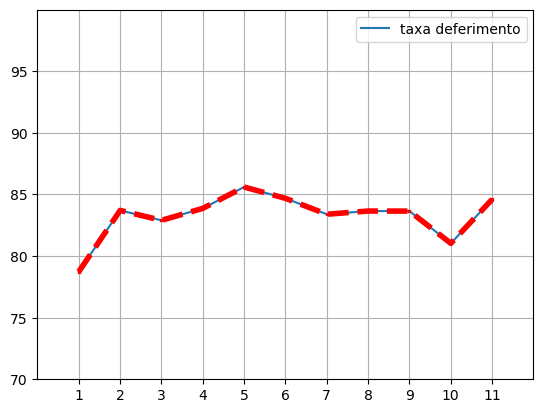

In [8]:
y = []
x = []
#confere média de tempo de registro
for mes in range(1, 12, 1):
    ano = 2022
    deferidos = 0
    indeferidos = 0 
    total = 0
    comando = f'select * from arquivadosxml where year(data)={ano} and month(data)={mes} and despacho in ("9.1","9.2") and anulado=0'
    cursor.execute(comando)
    resultado = cursor.fetchall()
    for row in resultado:
        numero = str(row[2])
        despacho = row[1]
        if despacho=='9.1':
            deferidos = deferidos + 1
        else:
            indeferidos = indeferidos + 1
        total = total + 1
    
    media=0
    if total>0:
        percentual = 100*(deferidos)/(deferidos + indeferidos)
    y.append(percentual)
    x.append(mes)
    print(f'Taxa deferimento: {total} {mes} = {percentual:.2f}')

plt.grid(visible=True)
plt.plot(x,y,label="taxa deferimento")
plt.ylim(70, 100)
plt.yticks(range(70,100,5))
plt.xlim(min(x)-1, max(x)+1)
plt.xticks(range(1, 12 , 1))
plt.legend()
plt.plot(x,y,color='red' , marker='x', markersize=2, linestyle='--', linewidth=4)
plt.show()
